In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, explained_variance_score, max_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import tensorflow as tf
import keras

In [2]:
#timestamp" - timestamp field for grouping the data
#"cnt" - the count of a new bike shares
#"t1" - real temperature in C
#"t2" - temperature in C "feels like"
#"hum" - humidity in percentage
#"windspeed" - wind speed in km/h
#"weathercode" - category of the weather
#"isholiday" - boolean field - 1 holiday / 0 non holiday
#"isweekend" - boolean field - 1 if the day is weekend
#"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

#"weathe_code" category description:
#1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

In [68]:
df = pd.read_csv("london_merged.csv", parse_dates = ['timestamp'])
df.head(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0


In [69]:
df.shape

(17414, 10)

In [70]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

Splitting the Date & Time, Convert to datetime

In [71]:
#df[['Date','Time']] = df['timestamp'].str.split(' ', expand=True)

df["Year"] = df["timestamp"].dt.year
df['Month'] = df["timestamp"].dt.month
df["Dayofweek"] = df["timestamp"].dt.dayofweek
df["Hour"] = df["timestamp"].dt.hour
df.head()
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,Year,Month,Dayofweek,Hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,1,19
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,1,20
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,1,21
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,1,1,22


In [72]:
index = df.set_index('timestamp', inplace=True)

<Figure size 936x360 with 0 Axes>

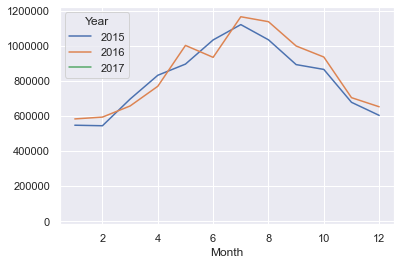

In [73]:
plt.figure(figsize=(13,5))
pvt = pd.pivot_table(df , columns='Year', index='Month', aggfunc= 'sum', values='cnt')

pvt.plot(subplots=False, use_index=True)
plt.ticklabel_format(style='plain')

In [74]:
pvt

Year,2015,2016,2017
Month,,,
1,546639.0,582518.0,37680.0
2,543594.0,592910.0,NaN
3,695934.0,656527.0,NaN
4,831582.0,768845.0,NaN
5,895413.0,1001935.0,NaN
6,1033252.0,933878.0,NaN
7,1120687.0,1165527.0,NaN
8,1033951.0,1137314.0,NaN
9,892478.0,998619.0,NaN


<AxesSubplot:xlabel='timestamp'>

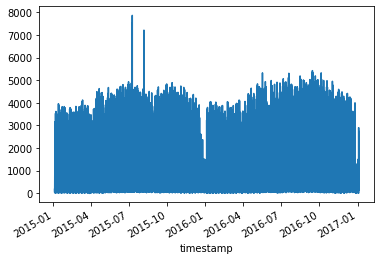

In [10]:
temp = df['cnt']
temp.plot()

In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0
Year,17414.0,2015.507810,0.508157,2015.0,2015.0,2016.0,2016.00,2017.0


In [12]:
# Some insights into the dataset

# Average Temp based on Mean is 12.5°C for real temp, 11.5°C for feel-like temp. 
# Max humudity at 100% seems very extreme
# Max windspeed at 56km/h means very strong winds. Walking is not easy with such high winds, unless its tail wind.

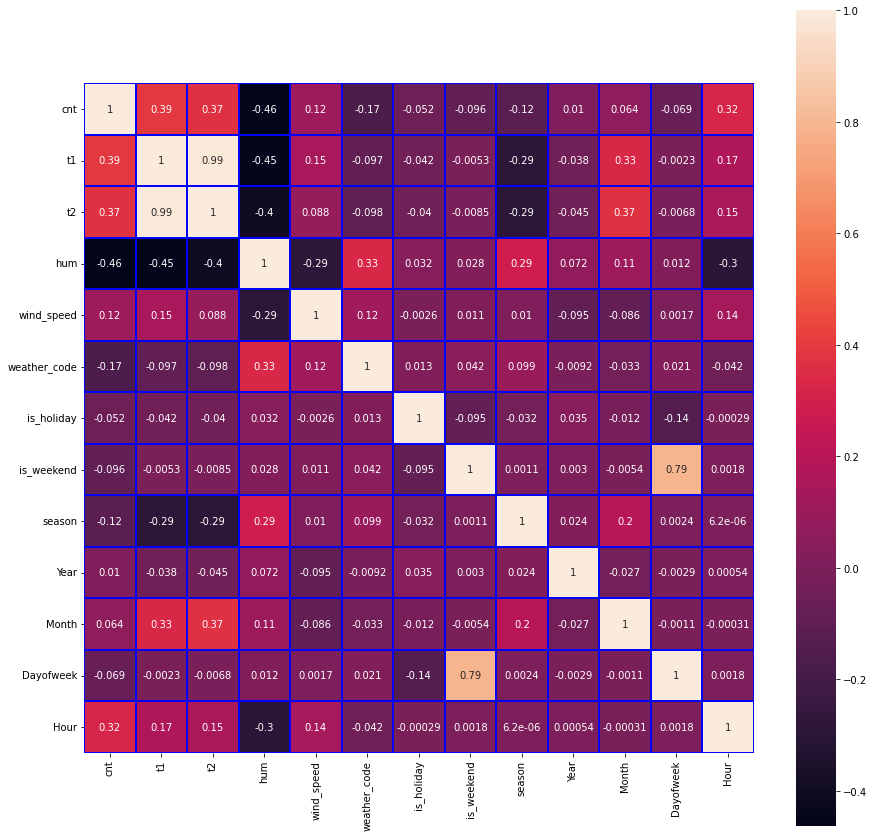

In [13]:
# Correlation Heatmap

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),linewidths=0.1, 
            square=True,  linecolor='blue', annot=True)
plt.show()

In [14]:
# From the Heatmap above,
# Low correalation between Hum with cnt, t1, t2 and windspeed
# High correlation between t1 and t2, isweekend and dayofweek

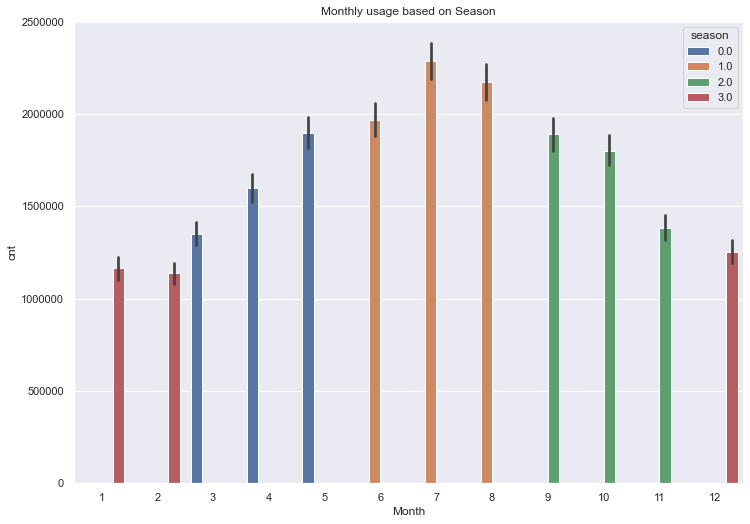

In [15]:
sns.set(rc={'figure.figsize':(12,8.5)})
seasons = sns.barplot(x = 'Month', y='cnt', hue= 'season', data = df, estimator=sum).set(title='Monthly usage based on Season')
plt.ticklabel_format(style='plain', axis='y')
#seasons1 = {0: "Spring", 1:"Summer", 2:"Fall", 3:"Winter"}
#df['season'] = df['season'].map(seasons1)

In [16]:
#Count of bicycle monthly basis based on Season
x = df.groupby(["season","Month"])["cnt"].sum()
x

season  Month
0.0     3        1352461
        4        1600427
        5        1897348
1.0     6        1967130
        7        2286214
        8        2171265
2.0     9        1891097
        10       1800752
        11       1381191
3.0     1        1166837
        2        1136504
        12       1254746
Name: cnt, dtype: int64

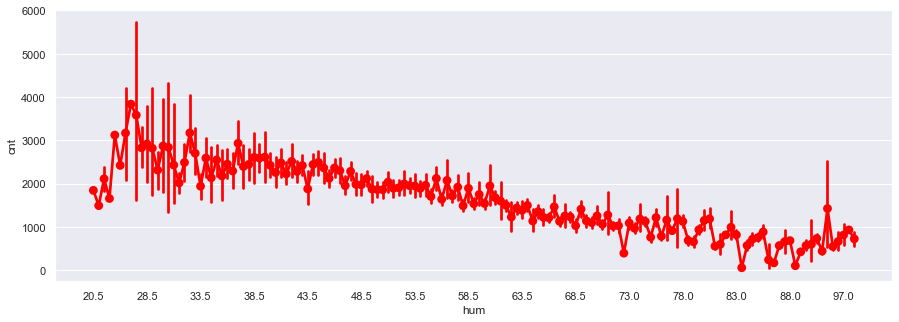

In [17]:
#Humidity

plt.figure(figsize=(15,5))
sns.pointplot(data=df, x=df.hum, y=df.cnt, color='Red')
plt.locator_params(axis='x', nbins=15)
plt.show()

In [18]:
# The feeling of humidity isnt very pleasant, as such, rentals decline as humidity goes up.

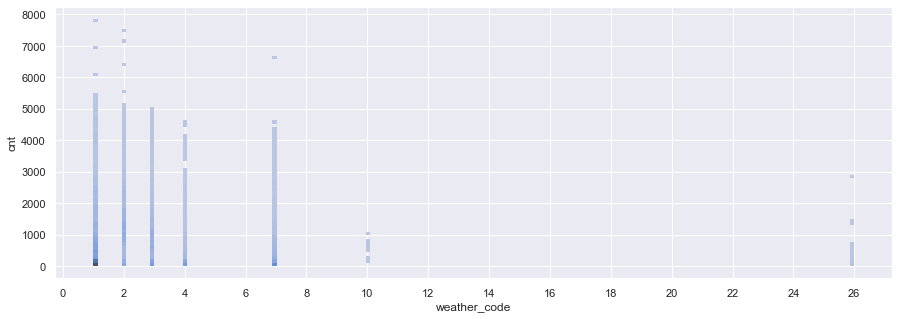

In [19]:
# Weather Usage

plt.figure(figsize=(15,5))
sns.histplot(data=df, x=df.weather_code, y=df.cnt)
plt.locator_params(axis='x', nbins=15)
plt.show()

In [20]:
# General trend is that the more intense the weather, the lesser the number of rentals.
# 1 - 3 shows clear to cloudy weather without rainfall.
# 4 - 26 depicts light to heavy precipitation.

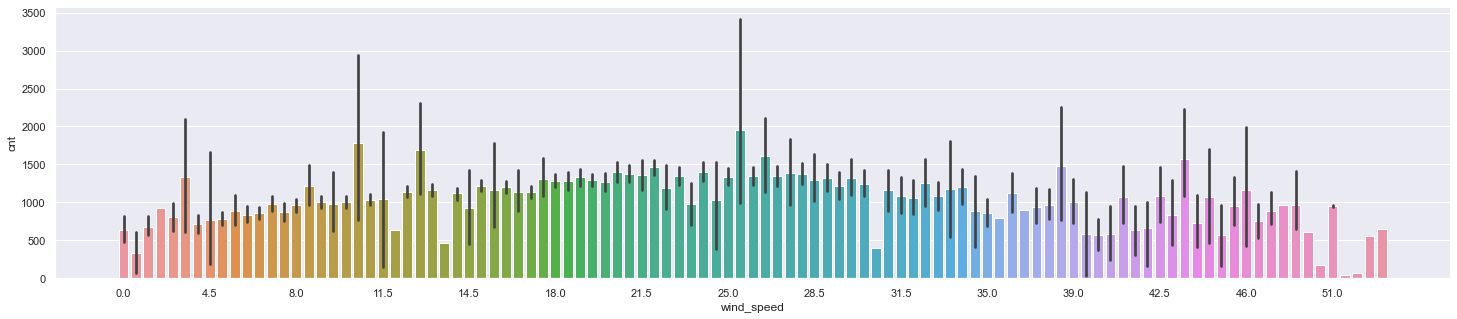

In [21]:
# Windspeed

plt.figure(figsize=(25,5))
sns.barplot(data=df, x=df.wind_speed, y=df.cnt)
plt.locator_params(axis='x', nbins=15)
plt.show()

In [22]:
# Based on the general curve of the plot, windspeed of 25km/h garners the most riders.
# But looking at the curve, there are quite a number of outliers where those speeds jumps or drops drastically from its neighbours

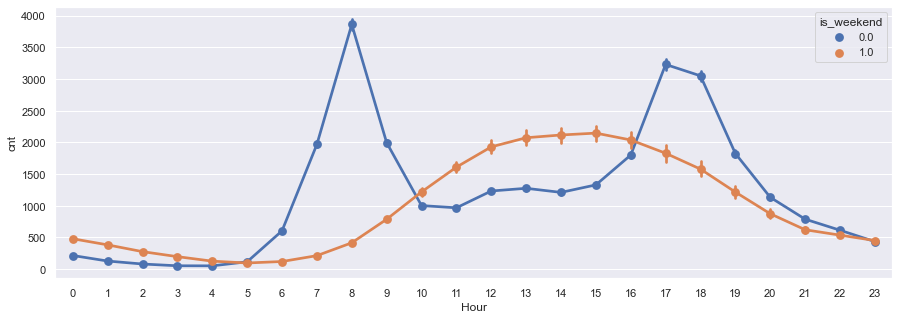

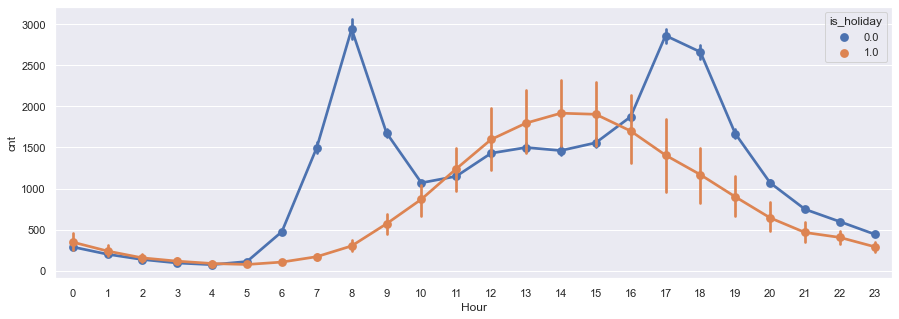

In [23]:
plt.figure(figsize=(15,5))
sns.pointplot(data=df, x=df.Hour, y=df.cnt, hue=df.is_weekend)
plt.show()
plt.figure(figsize=(15,5))
sns.pointplot(data=df, x=df.Hour, y=df.cnt, hue=df.is_holiday)
plt.show()

In [24]:
# Comparitively, the hours of a holiday are vastly different from a non holiday.

# People generally sleep in and have a nice slow morning on holidays, 
# before being active in the late mornings onwards.
# Similarly , when it is holiday. 

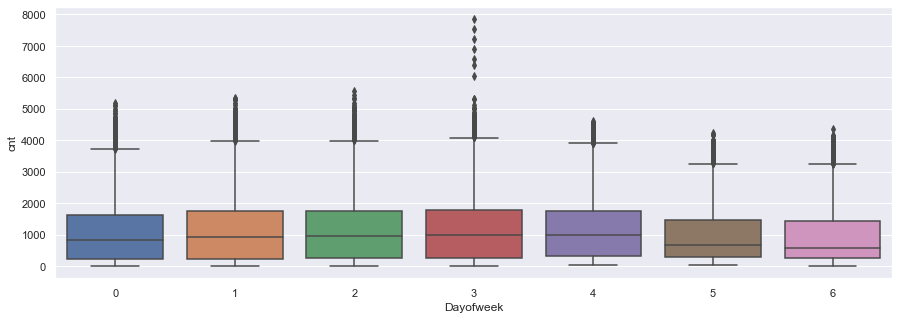

In [25]:
# Weekly Usage Patterns

plt.figure(figsize=(15,5))
sns.boxplot(data=df, x=df.Dayofweek, y=df.cnt)

plt.show()

In [26]:
# Mon to Wed has the highest days of usage with Wed peaking.
# Weekdays has much more usage/day as compared to weekends.

# I would suppose this might be a pattern in London, given that it is their thing to cycle to work and not use it that much over the weekend.
# It is the opposite scenario in my country.

In [76]:
#Change object to category data

df['weather_code'] = df['weather_code'].astype('category')
df['is_holiday'] = df['is_holiday'].astype('category')
df['is_weekend'] = df['is_weekend'].astype('category')
df['season'] = df['season'].astype('category')

df['Year'] = df['Year'].astype('category')
df['Month'] = df['Month'].astype('category')
df['Dayofweek'] = df['Dayofweek'].astype('category')
df['Hour'] = df['Hour'].astype('category')

#df.info()

### Label Encoding

In [77]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding

le = LabelEncoder()

columns = ['weather_code', 'is_holiday', 'is_weekend', 'season', 'Year', 'Month', 'Dayofweek', 'Hour']

for col in columns:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,Year,Month,Dayofweek,Hour
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,2,0,1,3,0,0,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0,0,1,3,0,0,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0,0,1,3,0,0,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0,0,1,3,0,0,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0,0,1,3,0,0,6,4


In [29]:
#Train-90% Test-10%
#train,test = train_test_split(df,test_size=0.1,random_state=0)
#print('Train Size:' ,train.shape)
#print('Test Size:', test.shape)

### TRAIN TEST SPLIT 
Train-90% Test-10%

In [78]:

from sklearn.model_selection import train_test_split

train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

15672 1742


### Scaler
Using RobustScaler will reduce the effects of outliers

In [79]:
from sklearn.preprocessing import RobustScaler

scaler  = RobustScaler()

num_colu = ['t1', 't2', 'hum', 'wind_speed']
trans_1 = scaler.fit(train[num_colu].to_numpy())
train.loc[:,num_colu] = trans_1.transform(train[num_colu].to_numpy())
test.loc[:,num_colu] = trans_1.transform(test[num_colu].to_numpy())

scaler2 = RobustScaler()
scaler2 = scaler2.fit(train[["cnt"]])
train["cnt"] = scaler2.transform(train[["cnt"]])
test["cnt"] = scaler2.transform(test[["cnt"]])

In [32]:
# input and output

In [80]:
def create_dataset(x,y,time_steps=1):
    x_train,y_train = [],[]
    
    for i in range(len(x)-time_steps):
        v = x.iloc[i:(i+time_steps)].values
        x_train.append(v)
        y_train.append(y.iloc[i+time_steps])
        
    return np.array(x_train),np.array(y_train)

Traditionally, time series forecasting has been dominated by linear methods because they are well understood and effective on many simpler forecasting problems.
Deep neural networks have proved to be powerful and are achieving high accuracy in many application fields. For these reasons, they are one of the most widely used methods of machine learning to solve problems dealing with big data nowadays


In order to proceed with the RNN, we will need to reshape our dataset[samples, time_steps, features] 


In [34]:
#Samples: the length of the data, or the amount of data points we have
#Time steps: this is equivalent to the amount of time steps we run our recurrent neural network. If we want our network to have memory of 10 days, this number should be 10
#Features: this is the number of dimensions we feed our neural network at each time steps. In our case we have 13 features per time step

In [81]:
#[samples, time steps, features]
time_steps = 10

x_train,y_train = create_dataset(train,train.cnt,time_steps)
x_test,y_test = create_dataset(test,test.cnt,time_steps)

print(x_train.shape,y_train.shape)

(15662, 10, 13) (15662,)


In [82]:
tf.random.set_seed(0)

### LSTM MODEL

Traditional RNN are good for processing sequence data for predictions but suffers from short-term memory hence LSTM and GRU were introduced as a method to mitigate short-term memory using mechanisms called gates.

In [37]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.LSTM(units=128, input_shape=(x_train.shape[1], x_train.shape[2]))) #The layer is composed by 128 LSTM cells. Each cell will give an output that will be provided as an input for the subsequent layer.
model1.add(tf.keras.layers.Dropout(rate=0.2))# The dropout rate is set to 20%, eg one in five inputs will be randomly excluded from each update cycle.
model1.add(tf.keras.layers.Dense(units=1)) #output will only be one value
model1.compile(loss='mse', optimizer='adam') #mse = mean squared error
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               72704     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 72,833
Trainable params: 72,833
Non-trainable params: 0
_________________________________________________________________


2023-01-06 23:49:46.267443: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [38]:
lstm = model1.fit(x_train, y_train,epochs=50,batch_size=32,validation_split=0.1,shuffle=False)

Epoch 1/50
441/441 [==============================] - 4s 7ms/step - loss: 0.1566 - val_loss: 0.0873
Epoch 2/50
441/441 [==============================] - 3s 6ms/step - loss: 0.0681 - val_loss: 0.0642
Epoch 3/50
441/441 [==============================] - 3s 6ms/step - loss: 0.0449 - val_loss: 0.0610
Epoch 4/50
441/441 [==============================] - 3s 6ms/step - loss: 0.0358 - val_loss: 0.0549
Epoch 5/50
441/441 [==============================] - 3s 6ms/step - loss: 0.0318 - val_loss: 0.0477
Epoch 6/50
441/441 [==============================] - 3s 6ms/step - loss: 0.0277 - val_loss: 0.0438
Epoch 7/50
441/441 [==============================] - 3s 6ms/step - loss: 0.0243 - val_loss: 0.0383
Epoch 8/50
441/441 [==============================] - 3s 6ms/step - loss: 0.0221 - val_loss: 0.0379
Epoch 9/50
441/441 [==============================] - 3s 6ms/step - loss: 0.0206 - val_loss: 0.0311
Epoch 10/50
441/441 [==============================] - 3s 6ms/step - loss: 0.0195 - val_loss: 0.0284

In [39]:
#invert predictions back to prescaled values
#since we used RobustScaler , we use inverse_transform to invert the transfromation

train_predictions = model1.predict(x_test)

y_train_inv = scaler2.inverse_transform(y_train.reshape(1, -1))
y_test_inv = scaler2.inverse_transform(y_test.reshape(1, -1))
train_pred_inv = scaler2.inverse_transform(train_predictions)

train_results = pd.DataFrame(data={'Train Predictions':train_pred_inv.flatten(), 'Actuals':y_test_inv.flatten()})

55/55 [==============================] - 0s 2ms/step


In [40]:
train_results

,Train Predictions,Actuals
0,1525.811768,1376.0
1,1094.567627,894.0
2,706.372498,615.0
3,524.493408,462.0
4,400.057709,481.0
...,...,...
1727,1422.105225,1042.0
1728,660.077332,541.0
1729,413.381287,337.0
1730,216.926025,224.0


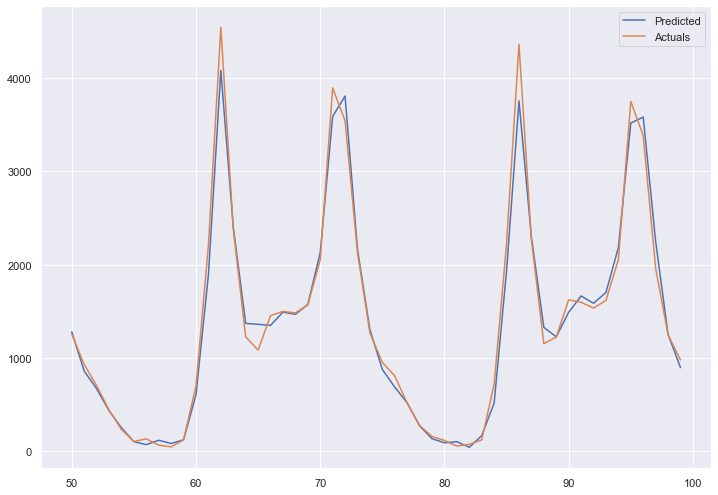

In [41]:
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])
plt.legend(['Predicted', 'Actuals'])

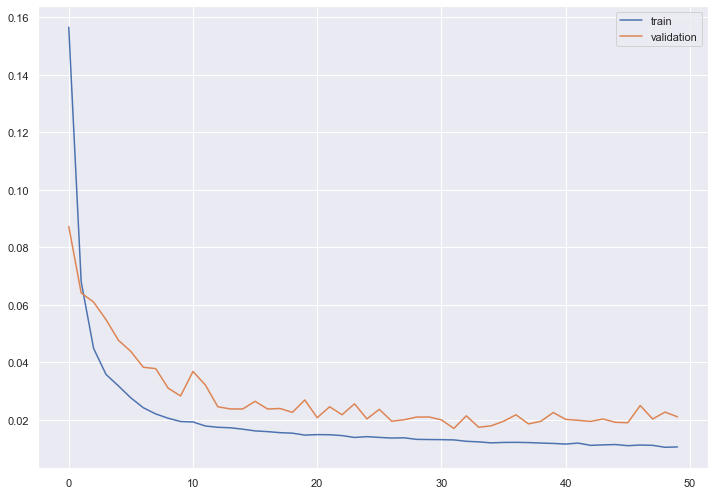

In [42]:
plt.plot(lstm.history['loss'], label='train')
plt.plot(lstm.history['val_loss'], label='validation')
plt.legend()
plt.show()

A low value for the loss means our model performed very well.

In [43]:
lstm_train_pred = model1.predict(x_train)
lstm_test_pred = model1.predict(x_test)

#calculate root mean squared error
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, lstm_train_pred)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, lstm_test_pred)))
print('MSE:', mean_squared_error(y_test, train_predictions))
print('Explained variance score:', explained_variance_score(y_test, train_predictions))

55/55 [==============================] - 0s 2ms/step
Train RMSE: 0.11969177346313367
Test RMSE: 0.15634960276049403
MSE: 0.02444519828336428
Explained variance score: 0.940909605485145


As we can see there is not much difference between The Predicted and The Actuals , We got 0.94 for the explained variance score given the huge param (72704)

If you are concerned about large errors, RMSE is a good metric to use. If the model overestimated or underestimated some points in the prediction (because the residual will be square, resulting in a large error), you should use RMSE.

The explained variance is used to measure the proportion of the variability of the predictions of a machine learning model. Simply put, it is the difference between the expected value and the predicted value

Mean Squared Error(MSE) is calculated as the average of the squared differences between the predicted and actual values. Simply put MSE is the average of the square of the errors. The larger the number the larger the error

### GRU Model

In [44]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.GRU(units=128, input_shape=(x_train.shape[1], x_train.shape[2])))
model2.add(tf.keras.layers.Dropout(rate=0.2))
model2.add(tf.keras.layers.Dense(units=1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               54912     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 55,041
Trainable params: 55,041
Non-trainable params: 0
_________________________________________________________________


In [45]:
gru = model2.fit(x_train, y_train,epochs=50,batch_size=32,validation_split=0.1,shuffle=False)

Epoch 1/50
441/441 [==============================] - 4s 6ms/step - loss: 0.2251 - val_loss: 0.1041
Epoch 2/50
441/441 [==============================] - 2s 6ms/step - loss: 0.0778 - val_loss: 0.0444
Epoch 3/50
441/441 [==============================] - 2s 5ms/step - loss: 0.0421 - val_loss: 0.0401
Epoch 4/50
441/441 [==============================] - 2s 6ms/step - loss: 0.0310 - val_loss: 0.0314
Epoch 5/50
441/441 [==============================] - 3s 6ms/step - loss: 0.0260 - val_loss: 0.0312
Epoch 6/50
441/441 [==============================] - 2s 6ms/step - loss: 0.0237 - val_loss: 0.0246
Epoch 7/50
441/441 [==============================] - 2s 6ms/step - loss: 0.0213 - val_loss: 0.0229
Epoch 8/50
441/441 [==============================] - 2s 6ms/step - loss: 0.0206 - val_loss: 0.0255
Epoch 9/50
441/441 [==============================] - 2s 6ms/step - loss: 0.0195 - val_loss: 0.0208
Epoch 10/50
441/441 [==============================] - 2s 5ms/step - loss: 0.0193 - val_loss: 0.0221

In [46]:
train_predictions2 = model2.predict(x_test)

y_train_inv = scaler2.inverse_transform(y_train.reshape(1, -1))
y_test_inv = scaler2.inverse_transform(y_test.reshape(1, -1))
train_pred_inv = scaler2.inverse_transform(train_predictions2)

train_results = pd.DataFrame(data={'Train Predictions':train_pred_inv.flatten(), 'Actuals':y_test_inv.flatten()})

55/55 [==============================] - 0s 2ms/step


In [47]:
train_results

,Train Predictions,Actuals
0,1421.836426,1376.0
1,940.137573,894.0
2,585.289368,615.0
3,394.364990,462.0
4,295.243469,481.0
...,...,...
1727,1314.863647,1042.0
1728,732.910706,541.0
1729,396.789124,337.0
1730,320.104431,224.0


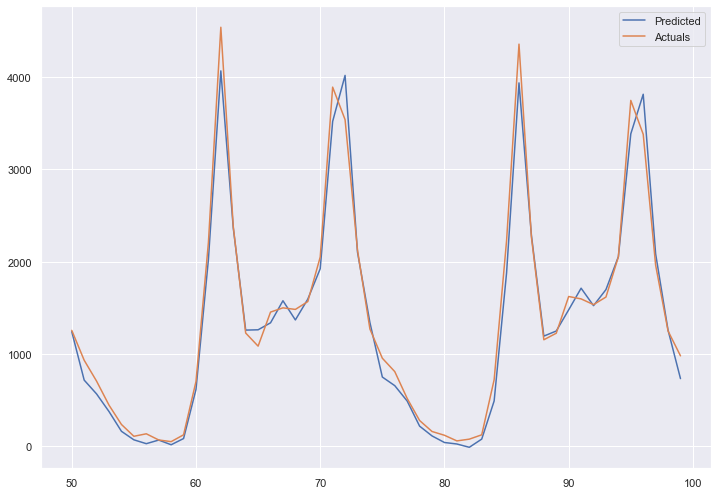

In [48]:
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])
plt.legend(['Predicted', 'Actuals'])


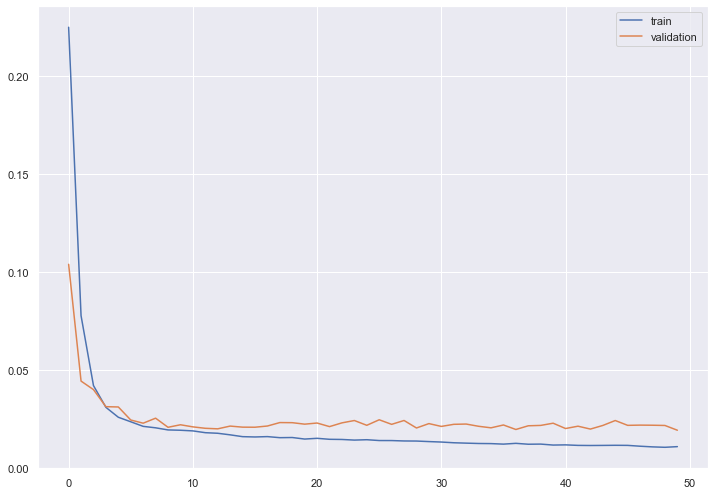

In [49]:
plt.plot(gru.history['loss'], label='train')
plt.plot(gru.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [50]:
gru_train_pred = model2.predict(x_train)
gru_test_pred = model2.predict(x_test)
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, gru_train_pred)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, gru_test_pred)))
print('MSE:', mean_squared_error(y_test, train_predictions2))
print('Explained variance score:', explained_variance_score(y_test, train_predictions2))

55/55 [==============================] - 0s 2ms/step
Train RMSE: 0.11052654952868815
Test RMSE: 0.16179669451030615
MSE: 0.026178170354461332
Explained variance score: 0.9373262292981961


As we can see it has similar performance to LSTM, but LSTM performed slightly better. It is still not bad if we are looking for less memory consumption and faster operation 

XGBOOST

In [120]:
from xgboost.sklearn import XGBRegressor
from sklearn import metrics
import xgboost as xgb

x = df.drop(['cnt', 'hum'],axis=1)
y = df['cnt']

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.1 , random_state = 0)

xgb_sklearn = xgb.sklearn.XGBRegressor()
xgb_sklearn.fit(x_train , y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [121]:
train_predictions4 = xgb_sklearn.predict(x_test)

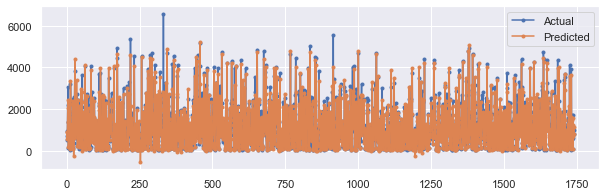

In [132]:
plt.figure(figsize=(10,3))
plt.plot(y_test.values,marker=".",label="actual")
plt.plot(train_predictions4,marker=".",label="prediction")
plt.legend(['Actual', 'Predicted'])
plt.show()

In [123]:
xgboost_train_pred = xgb_sklearn.predict(x_train)
xgboost_test_pred = xgb_sklearn.predict(x_test)


In [124]:
from sklearn.metrics import mean_squared_error, r2_score

In [125]:
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, xgboost_train_pred)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, xgboost_test_pred)))
print('MSE:', mean_squared_error(y_test, train_predictions4))
r2 = r2_score(y_test, train_predictions4)
print("R2:", r2)

Train RMSE: 165.16705699988714
Test RMSE: 264.3234022191779
MSE: 69866.86096072131
R2: 0.9428885808154956


In [126]:
train_predictions4 = xgb_sklearn.predict(x_test)
train_results = pd.DataFrame(data={'Train Predictions':train_predictions4.flatten(), 'Actuals':y_test})

In [127]:
train_results

,Train Predictions,Actuals
timestamp,,
2015-10-06 21:00:00,880.912964,705
2015-05-16 21:00:00,912.554260,958
2016-10-15 23:00:00,570.860657,497
2016-07-19 10:00:00,1390.917236,1392
2015-12-01 18:00:00,2448.231201,3073
...,...,...
2015-06-23 15:00:00,1589.404907,1696
2016-02-27 06:00:00,67.165977,92
2016-06-16 11:00:00,1256.900391,1125


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

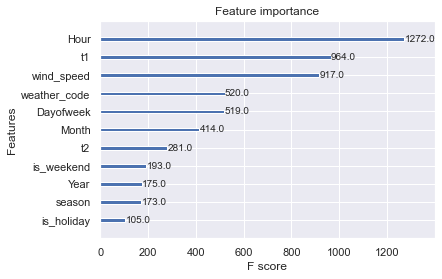

In [131]:
xgb.plot_importance(xgb_sklearn)

### END

****************************************************************************** END *********************************************************************************

In [128]:
#Determine rolling statistics
rolAverage = df.Month.rolling(window=365).mean()
rolSTD = df.Month.rolling(window=365).std()
print(rolAverage, rolAverage)


timestamp
2015-01-04 00:00:00         NaN
2015-01-04 01:00:00         NaN
2015-01-04 02:00:00         NaN
2015-01-04 03:00:00         NaN
2015-01-04 04:00:00         NaN
                         ...   
2017-01-03 19:00:00    8.950685
2017-01-03 20:00:00    8.920548
2017-01-03 21:00:00    8.890411
2017-01-03 22:00:00    8.860274
2017-01-03 23:00:00    8.830137
Name: Month, Length: 17414, dtype: float64 timestamp
2015-01-04 00:00:00         NaN
2015-01-04 01:00:00         NaN
2015-01-04 02:00:00         NaN
2015-01-04 03:00:00         NaN
2015-01-04 04:00:00         NaN
                         ...   
2017-01-03 19:00:00    8.950685
2017-01-03 20:00:00    8.920548
2017-01-03 21:00:00    8.890411
2017-01-03 22:00:00    8.860274
2017-01-03 23:00:00    8.830137
Name: Month, Length: 17414, dtype: float64


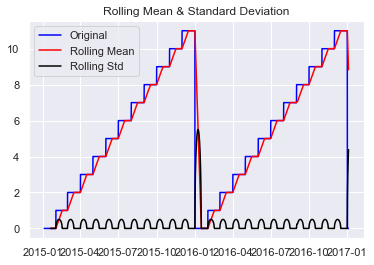

In [129]:
#Plot rolling statistics
orig = plt.plot(df.Month, color='blue', label='Original')
mean = plt.plot(rolAverage, color='red', label='Rolling Mean')
std = plt.plot(rolSTD, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


In [130]:

#winter = df2.loc[(df2.season == 3.0)]
#winter_temps = winter['TEMP_C']

#spring = df2.loc[(df2.season >= '201303010000') & (df2.season < '201306010000')]
#spring_temps = spring['TEMP_C']

#summer = df2.loc[(df2.season >= '201306010000') & (df2.season < '201309010000')]
#summer_temps = summer['TEMP_C']

#autumn = df2.loc[(df2.season >= '201309010000') & (df2.season < '201312010000')]
#autumn_temps = autumn['TEMP_C']